In [892]:
import pandas as pd
import numpy as np
import statistics
import matplotlib.pyplot as plt

In [893]:
P2ArbresFr = pd.read_csv("p2-arbres-fr.csv", sep=';')
P2ArbresFr.head(10)

,id,type_emplacement,domanialite,arrondissement,complement_addresse,numero,lieu,id_emplacement,libelle_francais,genre,espece,variete,circonference_cm,hauteur_m,stade_developpement,remarquable,geo_point_2d_a,geo_point_2d_b
0,99874,Arbre,Jardin,PARIS 7E ARRDT,NaN,NaN,MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E,19,Marronnier,Aesculus,hippocastanum,NaN,20,5,NaN,0.0,48.857620,2.320962
1,99875,Arbre,Jardin,PARIS 7E ARRDT,NaN,NaN,MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E,20,If,Taxus,baccata,NaN,65,8,A,NaN,48.857656,2.321031
2,99876,Arbre,Jardin,PARIS 7E ARRDT,NaN,NaN,MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E,21,If,Taxus,baccata,NaN,90,10,A,NaN,48.857705,2.321061
3,99877,Arbre,Jardin,PARIS 7E ARRDT,NaN,NaN,MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E,22,Erable,Acer,negundo,NaN,60,8,A,NaN,48.857722,2.321006
4,99878,Arbre,Jardin,PARIS 17E ARRDT,NaN,NaN,PARC CLICHY-BATIGNOLLES-MARTIN LUTHER KING,000G0037,Arbre à miel,Tetradium,daniellii,NaN,38,0,NaN,NaN,48.890435,2.315289
5,99879,Arbre,Jardin,PARIS 17E ARRDT,NaN,NaN,PARC CLICHY-BATIGNOLLES-MARTIN LUTHER KING,000G0036,Arbre à miel,Tetradium,daniellii,NaN,38,0,NaN,NaN,48.890470,2.315228
6,99880,Arbre,Jardin,PARIS 17E ARRDT,NaN,NaN,PARC CLICHY-BATIGNOLLES-MARTIN LUTHER KING,000G0035,Arbre à miel,Tetradium,daniellii,NaN,37,0,NaN,NaN,48.890504,2.315168
7,99881,Arbre,Jardin,PARIS 16E ARRDT,NaN,NaN,SQUARE ALEXANDRE ET RENE PARODI / 1 PLACE DE L...,35,Platane,Platanus,x hispanica,NaN,260,17,NaN,NaN,48.876722,2.280222
8,99882,Arbre,Jardin,PARIS 16E ARRDT,NaN,NaN,JARDIN DE L AVENUE FOCH / 10 AVENUE FOCH,802008,Sophora,Sophora,japonica,NaN,145,14,A,0.0,48.871990,2.275814
9,99883,Arbre,Jardin,PARIS 16E ARRDT,NaN,NaN,JARDIN DE L AVENUE FOCH / 10 AVENUE FOCH,802009,Sophora,Sophora,japonica,NaN,135,10,A,0.0,48.872046,2.275752


In [894]:
P2ArbresFr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200137 entries, 0 to 200136
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   200137 non-null  int64  
 1   type_emplacement     200137 non-null  object 
 2   domanialite          200136 non-null  object 
 3   arrondissement       200137 non-null  object 
 4   complement_addresse  30902 non-null   object 
 5   numero               0 non-null       float64
 6   lieu                 200137 non-null  object 
 7   id_emplacement       200137 non-null  object 
 8   libelle_francais     198640 non-null  object 
 9   genre                200121 non-null  object 
 10  espece               198385 non-null  object 
 11  variete              36777 non-null   object 
 12  circonference_cm     200137 non-null  int64  
 13  hauteur_m            200137 non-null  int64  
 14  stade_developpement  132932 non-null  object 
 15  remarquable      

In [895]:
# Nombre de lignes
len(P2ArbresFr)

200137

In [896]:
# Nombre de lignes en supprimant les lignes dupliquées
len(P2ArbresFr.drop_duplicates())

200137

Conclusion : Pas de valeur dupliquée dans le dataframe, donc aucun nettoyage à faire là dessus

# Identification des valeurs manquantes

On remarque que 'numero' est une valeur qui est vide pour la plupart des lignes

In [897]:
# Suppression de la ligne "numéro"
P2ArbresFr=P2ArbresFr.drop(columns='numero')

In [898]:
P2ArbresFr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200137 entries, 0 to 200136
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   200137 non-null  int64  
 1   type_emplacement     200137 non-null  object 
 2   domanialite          200136 non-null  object 
 3   arrondissement       200137 non-null  object 
 4   complement_addresse  30902 non-null   object 
 5   lieu                 200137 non-null  object 
 6   id_emplacement       200137 non-null  object 
 7   libelle_francais     198640 non-null  object 
 8   genre                200121 non-null  object 
 9   espece               198385 non-null  object 
 10  variete              36777 non-null   object 
 11  circonference_cm     200137 non-null  int64  
 12  hauteur_m            200137 non-null  int64  
 13  stade_developpement  132932 non-null  object 
 14  remarquable          137039 non-null  float64
 15  geo_point_2d_a   

In [899]:
P2ArbresFrMissing = P2ArbresFr.isna()
P2ArbresFrMissing.head()

,id,type_emplacement,domanialite,arrondissement,complement_addresse,lieu,id_emplacement,libelle_francais,genre,espece,variete,circonference_cm,hauteur_m,stade_developpement,remarquable,geo_point_2d_a,geo_point_2d_b
0,False,False,False,False,True,False,False,False,False,False,True,False,False,True,False,False,False
1,False,False,False,False,True,False,False,False,False,False,True,False,False,False,True,False,False
2,False,False,False,False,True,False,False,False,False,False,True,False,False,False,True,False,False
3,False,False,False,False,True,False,False,False,False,False,True,False,False,False,True,False,False
4,False,False,False,False,True,False,False,False,False,False,True,False,False,True,True,False,False


In [900]:
# Calcul du pourcentage du taux des valeurs manquantes pour chaque colonne
P2ArbresFrMissing.mean()*100

id                      0.000000
type_emplacement        0.000000
domanialite             0.000500
arrondissement          0.000000
complement_addresse    84.559577
lieu                    0.000000
id_emplacement          0.000000
libelle_francais        0.747988
genre                   0.007995
espece                  0.875400
variete                81.624088
circonference_cm        0.000000
hauteur_m               0.000000
stade_developpement    33.579498
remarquable            31.527404
geo_point_2d_a          0.000000
geo_point_2d_b          0.000000
dtype: float64

Une fois qu'on a calculé le pourcentage de valeurs manquantes pour chaque colonne, j'ai décidé de supprimé les colonnés avec un taux élevé de valeurs manquantes

In [901]:
P2ArbresFrClean=P2ArbresFr.drop(columns=['complement_addresse','variete'])

In [902]:
P2ArbresFrClean.head()

,id,type_emplacement,domanialite,arrondissement,lieu,id_emplacement,libelle_francais,genre,espece,circonference_cm,hauteur_m,stade_developpement,remarquable,geo_point_2d_a,geo_point_2d_b
0,99874,Arbre,Jardin,PARIS 7E ARRDT,MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E,19,Marronnier,Aesculus,hippocastanum,20,5,NaN,0.0,48.857620,2.320962
1,99875,Arbre,Jardin,PARIS 7E ARRDT,MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E,20,If,Taxus,baccata,65,8,A,NaN,48.857656,2.321031
2,99876,Arbre,Jardin,PARIS 7E ARRDT,MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E,21,If,Taxus,baccata,90,10,A,NaN,48.857705,2.321061
3,99877,Arbre,Jardin,PARIS 7E ARRDT,MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E,22,Erable,Acer,negundo,60,8,A,NaN,48.857722,2.321006
4,99878,Arbre,Jardin,PARIS 17E ARRDT,PARC CLICHY-BATIGNOLLES-MARTIN LUTHER KING,000G0037,Arbre à miel,Tetradium,daniellii,38,0,NaN,NaN,48.890435,2.315289


# # Identification des valeurs manquantes

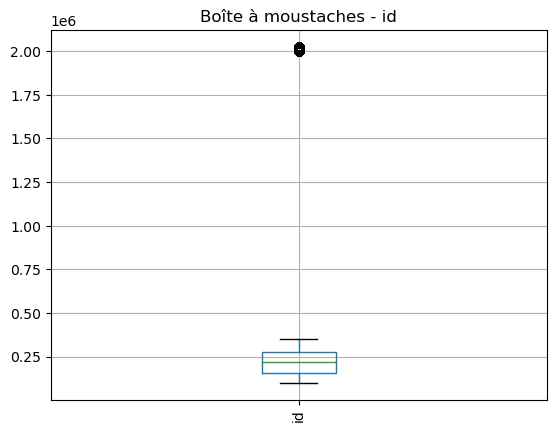

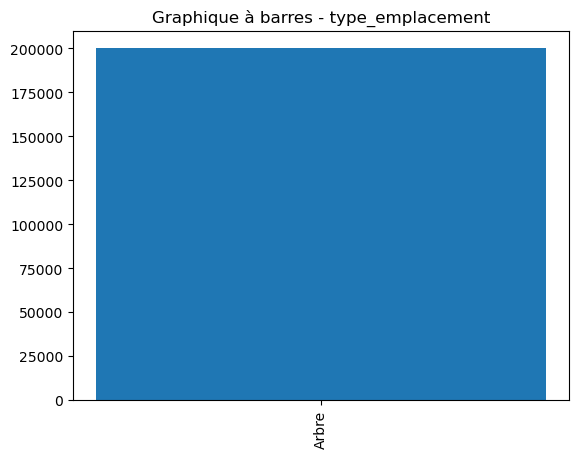

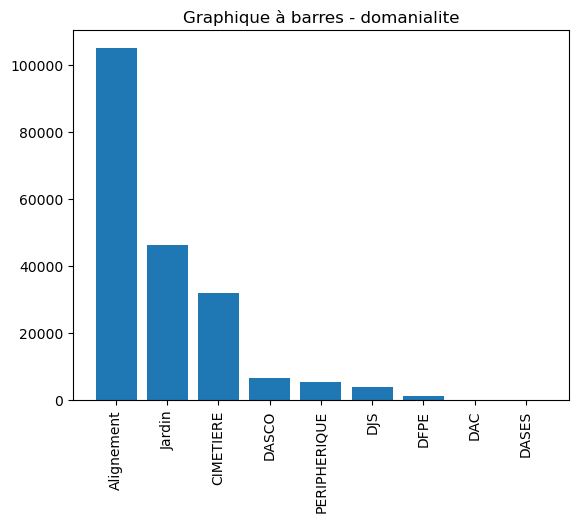

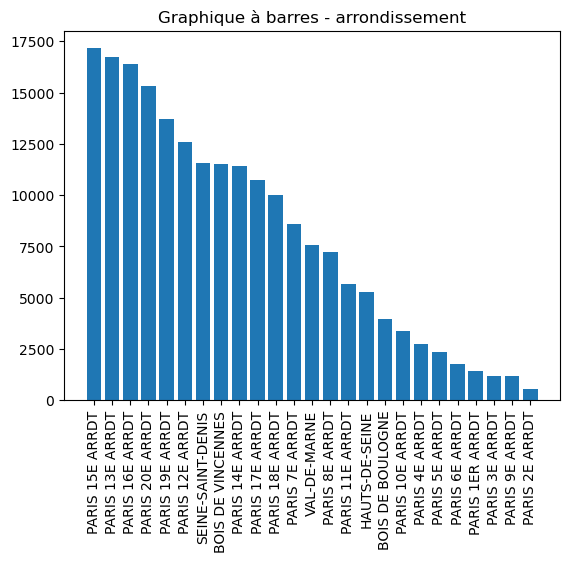

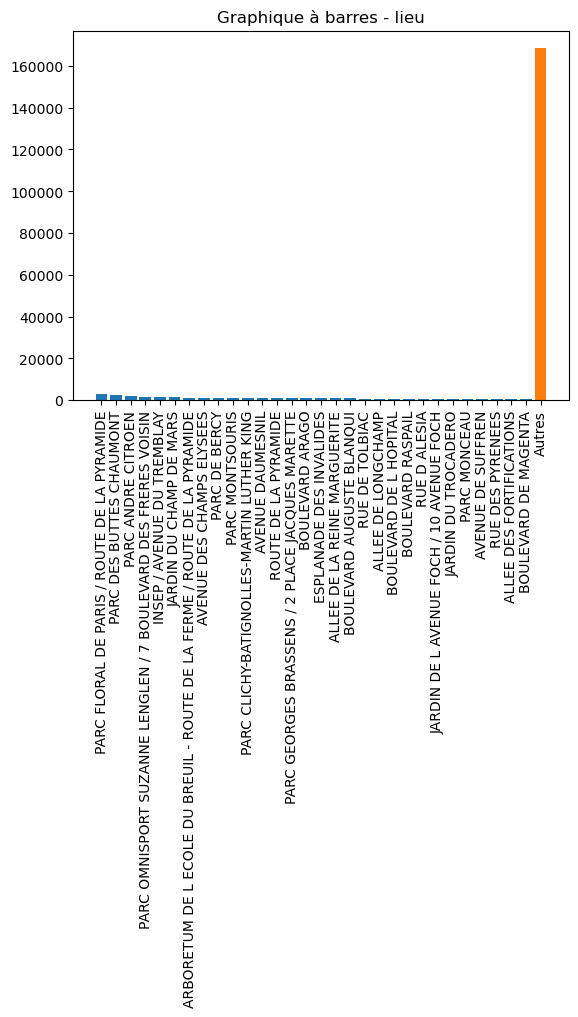

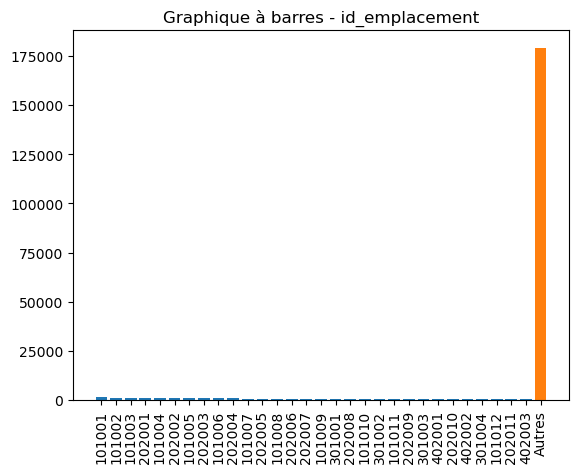

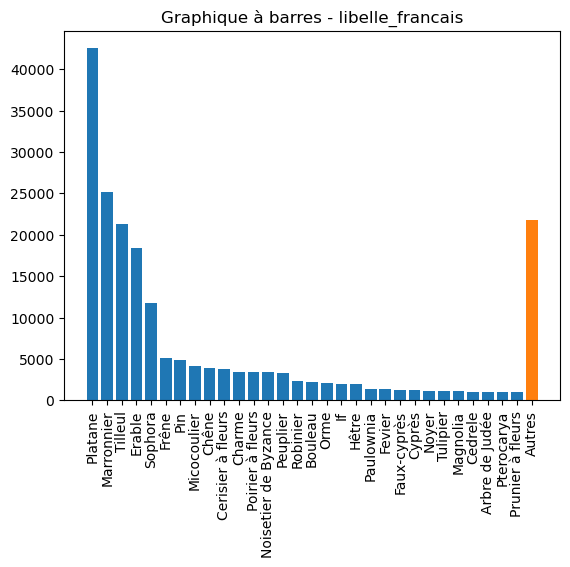

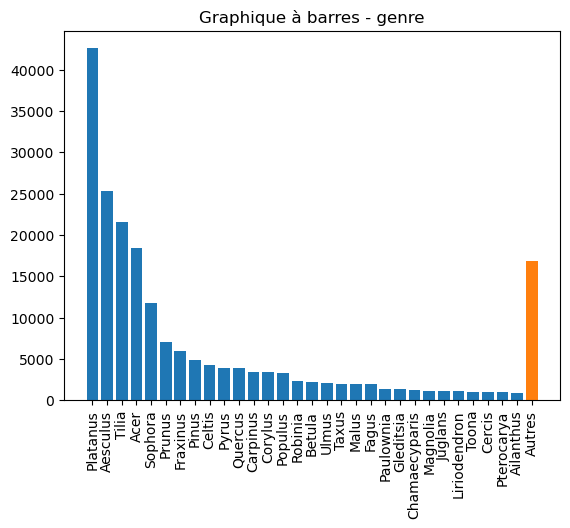

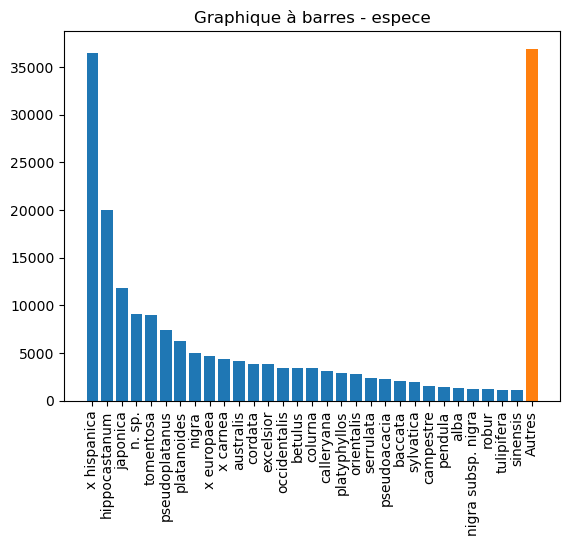

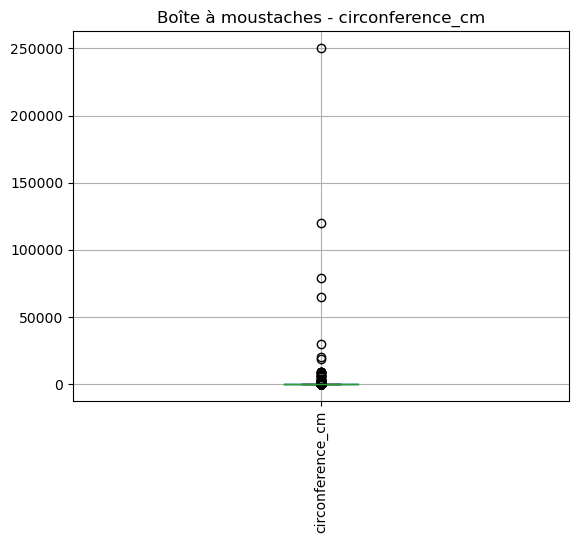

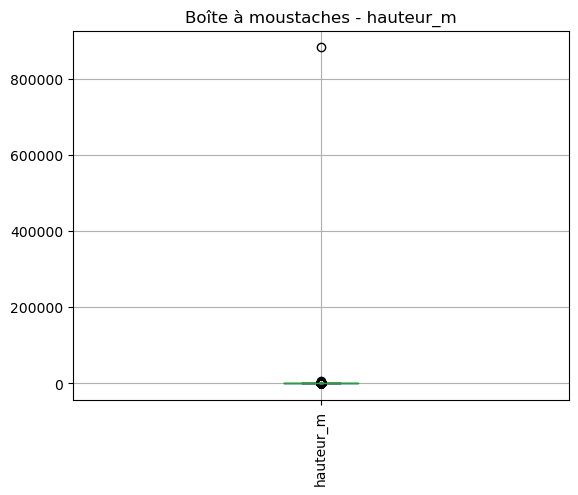

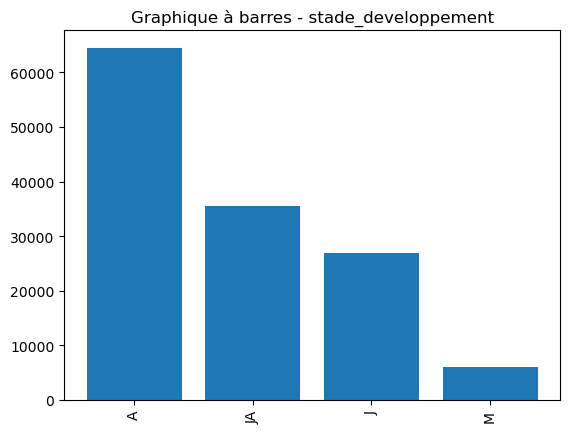

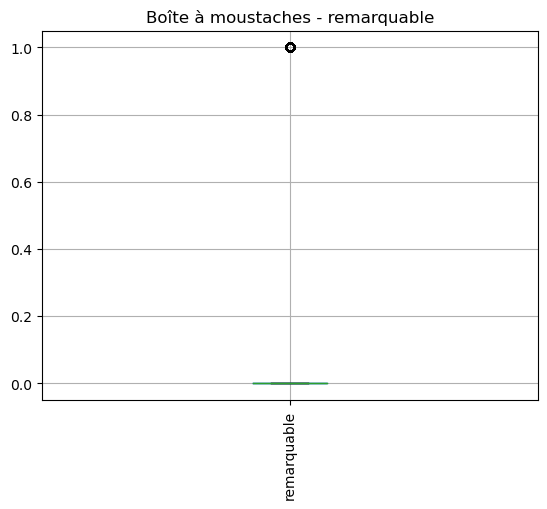

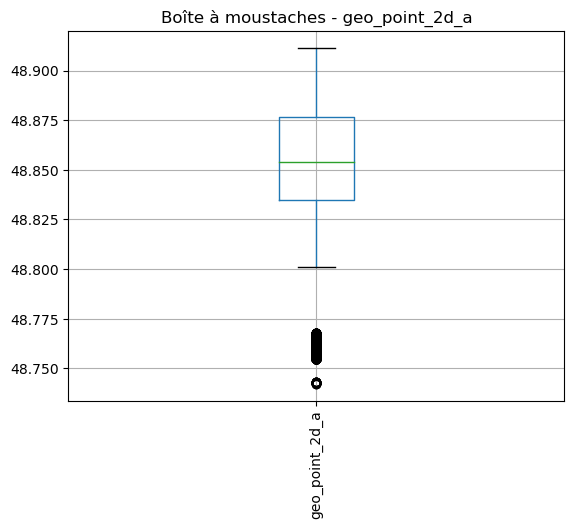

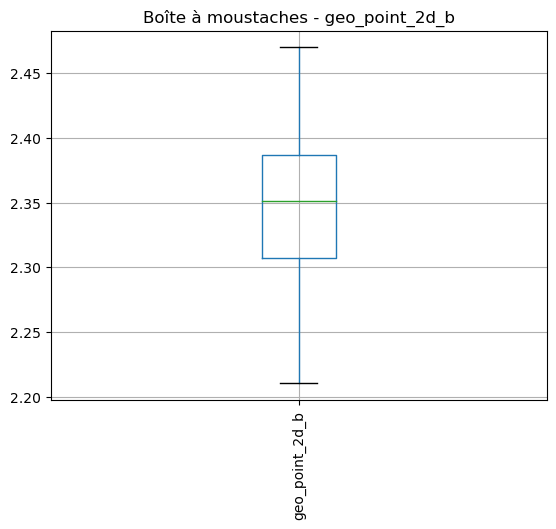

In [903]:
# Boucle pour parcourir chaque colonne du dataframe
for i in P2ArbresFrClean.columns:
    # Vérifiez le type pour chaque colonne
    if pd.api.types.is_numeric_dtype(P2ArbresFrClean[i]):
        # Si la colonne est de type numérique, je souhaiterai générer une boite à moustache
        P2ArbresFrClean.boxplot(column=i)
        plt.xticks(rotation='vertical') 
        plt.title(f"Boîte à moustaches - {i}")
        plt.show()
    else:
        # Sinon générer un graphe en barres, et n'afficher que les 10 valeurs les plus récurrentes
        Valeurs = P2ArbresFrClean[i].value_counts().nlargest(30)
        Autres = P2ArbresFrClean[i].value_counts().nsmallest(len(P2ArbresFrClean[i].unique()) - 30).sum()
        plt.xticks(rotation='vertical') 
        plt.bar(Valeurs.index, Valeurs.values)
        plt.title(f"Graphique à barres - {i}")
        
        if Autres > 0:
            plt.bar("Autres", Autres)
        
        plt.show()


On remarque que plusieurs colonnes censées être une répartition un peu bizarre, on va s'intéresser dans le cadre de cette analyse, à 3 colonnes en particulier : 
- La colonne Remaquable qui doit être un booléen et non une valeur numérique -> On remplacera ces valeurs numériques par un booléen
- Les colonnes circonférence et hauteur dont l'analyse univariée en utilisant la méthode interquantile nous démontre qu'il y a plusieurs valeurs considérées "aberrantes" et aussi qui paraissent illogiques.

# Switcher la colonne remarquable en un booléen

In [904]:
P2ArbresFrClean["remarquable"].value_counts()

0.0    136855
1.0       184
Name: remarquable, dtype: int64

In [905]:
P2ArbresFrClean["remarquable"] = P2ArbresFrClean["remarquable"].replace(0.0, False)

# Remplacez les valeurs NaN par False
P2ArbresFrClean["remarquable"] = P2ArbresFrClean["remarquable"].fillna(False)

# Convertissez les valeurs non nulles restantes en True
P2ArbresFrClean["remarquable"] = P2ArbresFrClean["remarquable"].astype(bool)
P2ArbresFrClean.head()

,id,type_emplacement,domanialite,arrondissement,lieu,id_emplacement,libelle_francais,genre,espece,circonference_cm,hauteur_m,stade_developpement,remarquable,geo_point_2d_a,geo_point_2d_b
0,99874,Arbre,Jardin,PARIS 7E ARRDT,MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E,19,Marronnier,Aesculus,hippocastanum,20,5,NaN,False,48.857620,2.320962
1,99875,Arbre,Jardin,PARIS 7E ARRDT,MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E,20,If,Taxus,baccata,65,8,A,False,48.857656,2.321031
2,99876,Arbre,Jardin,PARIS 7E ARRDT,MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E,21,If,Taxus,baccata,90,10,A,False,48.857705,2.321061
3,99877,Arbre,Jardin,PARIS 7E ARRDT,MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E,22,Erable,Acer,negundo,60,8,A,False,48.857722,2.321006
4,99878,Arbre,Jardin,PARIS 17E ARRDT,PARC CLICHY-BATIGNOLLES-MARTIN LUTHER KING,000G0037,Arbre à miel,Tetradium,daniellii,38,0,NaN,False,48.890435,2.315289


# Analyse et nettoyage des colonnes circonférences et hauteur.

In [906]:
circonference = P2ArbresFrClean['circonference_cm']
hauteur = P2ArbresFrClean['hauteur_m']

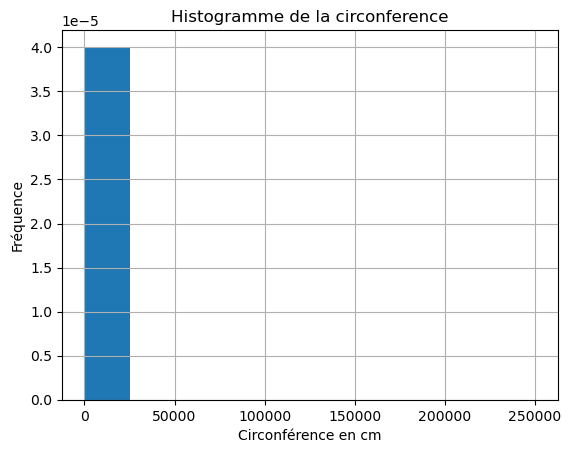

In [907]:
# Histogramme de la circonference
circonference.hist(density=True)
plt.title("Histogramme de la circonference")
plt.xlabel("Circonférence en cm")
plt.ylabel("Fréquence")
plt.show()

L'histogramme nous démontre que nous avons des circonférences qui ne paraissent pas logique : 
donc on va chercher à avoir la valeur max et min ainsi que la médiane pour pouvoir étudier uniquement les valeurs logiques.

In [908]:
# Analyse de la valeur circonférence en calculant le max et min
CirconferenceMIN = np.amin(circonference)
CirconferenceMAX = np.amax(circonference)
print(CirconferenceMIN)
print(CirconferenceMAX)

0
250255


Cela paraît aberrant d'avoir des arbres avec une circonférence de 250255 cm

In [909]:
# Analyse de la valeur circonférence en calculant la médiane et l'écart type
CirconferenceMED = np.median(circonference)
CirconferenceET = np.std(circonference)
print(CirconferenceMED)
print(CirconferenceET)

70.0
673.188531177667


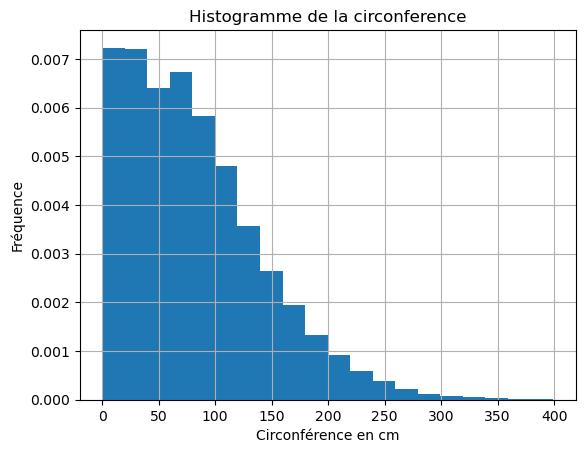

In [910]:
# Histogramme plus restreint en prenant en compte uniquement le spectre Mediane +/- ET/2)
P2ArbresFrClean[P2ArbresFrClean.circonference_cm < 400]['circonference_cm'].hist(density=True,bins=20)
plt.title("Histogramme de la circonference")
plt.xlabel("Circonférence en cm")
plt.ylabel("Fréquence")
plt.show()

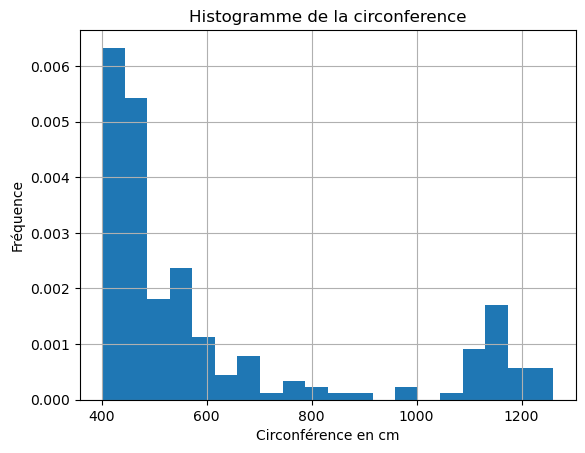

In [911]:
# Histogramme des valeurs atypiques
P2ArbresFrClean[(P2ArbresFrClean.circonference_cm > 400) & (P2ArbresFrClean.circonference_cm < 1300)]['circonference_cm'].hist(density=True,bins=20)
plt.title("Histogramme de la circonference")
plt.xlabel("Circonférence en cm")
plt.ylabel("Fréquence")
plt.show()

Je souhaitai représenter aussi l'histogramme de la circonference des arbles entre 400cm et 1300cm, au delà de cette valeur, les valeurs sont considérées aberrantes car le record de la circonférence max est de 1300cm

In [912]:
# Pour continuer on remplace les valeurs aberrantes par NaN
P2ArbresFrClean.loc[(P2ArbresFrClean['circonference_cm'] > 1300), 'circonference_cm'] = np.nan
P2ArbresFrClean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200137 entries, 0 to 200136
Data columns (total 15 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   200137 non-null  int64  
 1   type_emplacement     200137 non-null  object 
 2   domanialite          200136 non-null  object 
 3   arrondissement       200137 non-null  object 
 4   lieu                 200137 non-null  object 
 5   id_emplacement       200137 non-null  object 
 6   libelle_francais     198640 non-null  object 
 7   genre                200121 non-null  object 
 8   espece               198385 non-null  object 
 9   circonference_cm     200099 non-null  float64
 10  hauteur_m            200137 non-null  int64  
 11  stade_developpement  132932 non-null  object 
 12  remarquable          200137 non-null  bool   
 13  geo_point_2d_a       200137 non-null  float64
 14  geo_point_2d_b       200137 non-null  float64
dtypes: bool(1), float

In [913]:
# Pour continuer on remplace les valeurs aberrantes par NaN
P2ArbresFrClean.loc[P2ArbresFrClean['circonference_cm'] == 0, 'circonference_cm'] = np.nan
P2ArbresFrClean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200137 entries, 0 to 200136
Data columns (total 15 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   200137 non-null  int64  
 1   type_emplacement     200137 non-null  object 
 2   domanialite          200136 non-null  object 
 3   arrondissement       200137 non-null  object 
 4   lieu                 200137 non-null  object 
 5   id_emplacement       200137 non-null  object 
 6   libelle_francais     198640 non-null  object 
 7   genre                200121 non-null  object 
 8   espece               198385 non-null  object 
 9   circonference_cm     174232 non-null  float64
 10  hauteur_m            200137 non-null  int64  
 11  stade_developpement  132932 non-null  object 
 12  remarquable          200137 non-null  bool   
 13  geo_point_2d_a       200137 non-null  float64
 14  geo_point_2d_b       200137 non-null  float64
dtypes: bool(1), float

In [914]:
P2ArbresFrClean.head()

,id,type_emplacement,domanialite,arrondissement,lieu,id_emplacement,libelle_francais,genre,espece,circonference_cm,hauteur_m,stade_developpement,remarquable,geo_point_2d_a,geo_point_2d_b
0,99874,Arbre,Jardin,PARIS 7E ARRDT,MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E,19,Marronnier,Aesculus,hippocastanum,20.0,5,NaN,False,48.857620,2.320962
1,99875,Arbre,Jardin,PARIS 7E ARRDT,MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E,20,If,Taxus,baccata,65.0,8,A,False,48.857656,2.321031
2,99876,Arbre,Jardin,PARIS 7E ARRDT,MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E,21,If,Taxus,baccata,90.0,10,A,False,48.857705,2.321061
3,99877,Arbre,Jardin,PARIS 7E ARRDT,MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E,22,Erable,Acer,negundo,60.0,8,A,False,48.857722,2.321006
4,99878,Arbre,Jardin,PARIS 17E ARRDT,PARC CLICHY-BATIGNOLLES-MARTIN LUTHER KING,000G0037,Arbre à miel,Tetradium,daniellii,38.0,0,NaN,False,48.890435,2.315289


In [915]:
# On vérifie que le remplacement par NaN a bien été pris en compte en vérifiant la circonférence Max
CirconferenceMIN = np.amin(P2ArbresFrClean['circonference_cm'])
CirconferenceMAX = np.amax(P2ArbresFrClean['circonference_cm'])
print(CirconferenceMIN)
print(CirconferenceMAX)

1.0
1260.0


Même travail sur les hauteurs des arbres

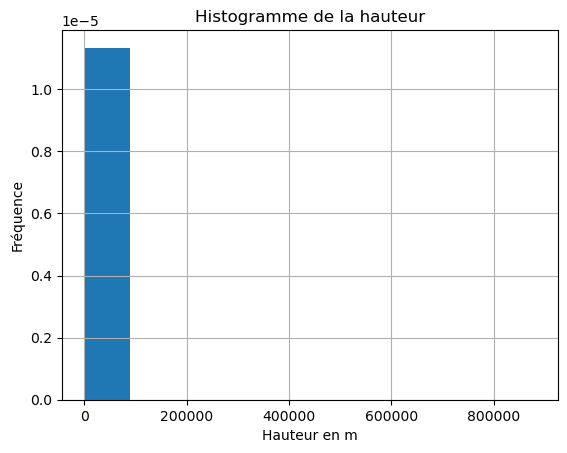

In [916]:
# Histogramme de l'hauteur
hauteur.hist(density=True)
plt.title("Histogramme de la hauteur")
plt.xlabel("Hauteur en m")
plt.ylabel("Fréquence")
plt.show()

In [917]:
# Analyse de la valeur hauteur en calculant le max et min
hauteurMIN = np.amin(hauteur)
hauteurMAX = np.amax(hauteur)
print(hauteurMIN)
print(hauteurMAX)

0
881818


La valeur max parait aberrante pour des arbres qui mesurent 881818m p

In [918]:
hauteurMED = np.median(hauteur)
hauteurET = np.std(hauteur)
print(hauteurMED)
print(hauteurET)

8.0
1971.2124619166175


L'écart-type parait bien faussé, et cela fait penser à une erreur de prise de mesure en les m et les cm.
L'arbre le plus haut de paris mesure 30 m donc on se basera sur cette valeur pour faire notre étude - PS : https://agriculture.gouv.fr/lun-des-plus-grands-arbres-de-paris-veille-sur-le-78-rue-de-varenne#:~:text=30%20m%C3%A8tres%20de%20haut%20!,parc%20et%20des%20espaces%20verts.

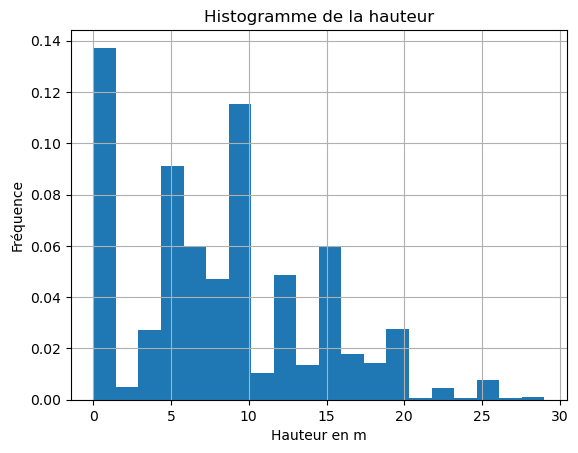

In [919]:
# Histogramme des arbres de -30m
P2ArbresFrClean[P2ArbresFrClean.hauteur_m < 30]['hauteur_m'].hist(density=True,bins=20)
plt.title("Histogramme de la hauteur")
plt.xlabel("Hauteur en m")
plt.ylabel("Fréquence")
plt.show()

In [920]:
# On remplace les valeurs aberrantes par NaN
P2ArbresFrClean.loc[P2ArbresFrClean['hauteur_m'] == 0, 'hauteur_m'] = np.nan
P2ArbresFrClean[(P2ArbresFrClean['hauteur_m'] > 30)] = np.nan
P2ArbresFrClean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200137 entries, 0 to 200136
Data columns (total 15 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   199564 non-null  float64
 1   type_emplacement     199564 non-null  object 
 2   domanialite          199563 non-null  object 
 3   arrondissement       199564 non-null  object 
 4   lieu                 199564 non-null  object 
 5   id_emplacement       199564 non-null  object 
 6   libelle_francais     198067 non-null  object 
 7   genre                199548 non-null  object 
 8   espece               197812 non-null  object 
 9   circonference_cm     173669 non-null  float64
 10  hauteur_m            160345 non-null  float64
 11  stade_developpement  132396 non-null  object 
 12  remarquable          199564 non-null  object 
 13  geo_point_2d_a       199564 non-null  float64
 14  geo_point_2d_b       199564 non-null  float64
dtypes: float64(5), ob

In [921]:
P2ArbresFrClean.head()

,id,type_emplacement,domanialite,arrondissement,lieu,id_emplacement,libelle_francais,genre,espece,circonference_cm,hauteur_m,stade_developpement,remarquable,geo_point_2d_a,geo_point_2d_b
0,99874.0,Arbre,Jardin,PARIS 7E ARRDT,MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E,19,Marronnier,Aesculus,hippocastanum,20.0,5.0,NaN,False,48.857620,2.320962
1,99875.0,Arbre,Jardin,PARIS 7E ARRDT,MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E,20,If,Taxus,baccata,65.0,8.0,A,False,48.857656,2.321031
2,99876.0,Arbre,Jardin,PARIS 7E ARRDT,MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E,21,If,Taxus,baccata,90.0,10.0,A,False,48.857705,2.321061
3,99877.0,Arbre,Jardin,PARIS 7E ARRDT,MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E,22,Erable,Acer,negundo,60.0,8.0,A,False,48.857722,2.321006
4,99878.0,Arbre,Jardin,PARIS 17E ARRDT,PARC CLICHY-BATIGNOLLES-MARTIN LUTHER KING,000G0037,Arbre à miel,Tetradium,daniellii,38.0,NaN,NaN,False,48.890435,2.315289


In [922]:
# Analyse de la valeur hauteur en calculant le max et min
hauteurMIN = np.amin(P2ArbresFrClean['hauteur_m'])
hauteurMAX = np.amax(P2ArbresFrClean['hauteur_m'])
print(hauteurMIN)
print(hauteurMAX)

1.0
30.0


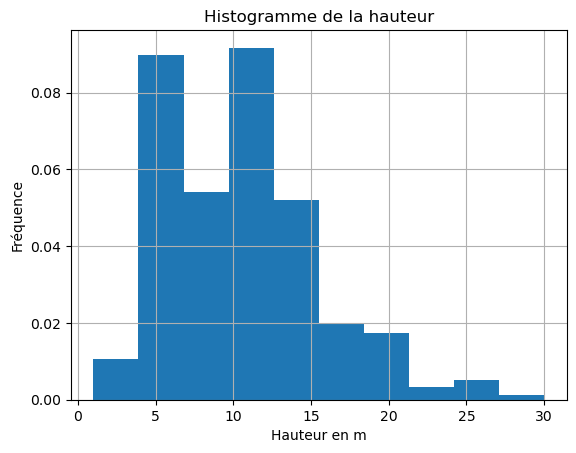

In [923]:
P2ArbresFrClean.hauteur_m.hist(density=True)
plt.title("Histogramme de la hauteur")
plt.xlabel("Hauteur en m")
plt.ylabel("Fréquence")
plt.show()

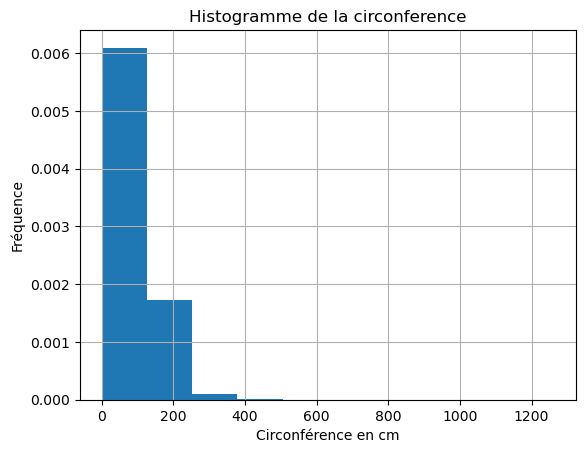

In [924]:
P2ArbresFrClean.circonference_cm.hist(density=True)
plt.title("Histogramme de la circonference")
plt.xlabel("Circonférence en cm")
plt.ylabel("Fréquence")
plt.show()

# Analyse des arrondissements

In [925]:
P2ArbresFrClean["arrondissement"].value_counts()

PARIS 15E ARRDT      17123
PARIS 13E ARRDT      16480
PARIS 16E ARRDT      16374
PARIS 20E ARRDT      15328
PARIS 19E ARRDT      13675
PARIS 12E ARRDT      12558
SEINE-SAINT-DENIS    11565
BOIS DE VINCENNES    11486
PARIS 14E ARRDT      11383
PARIS 17E ARRDT      10754
PARIS 18E ARRDT       9986
PARIS 7E ARRDT        8572
VAL-DE-MARNE          7564
PARIS 8E ARRDT        7238
PARIS 11E ARRDT       5645
HAUTS-DE-SEINE        5298
BOIS DE BOULOGNE      3973
PARIS 10E ARRDT       3383
PARIS 4E ARRDT        2736
PARIS 5E ARRDT        2353
PARIS 6E ARRDT        1759
PARIS 1ER ARRDT       1408
PARIS 3E ARRDT        1209
PARIS 9E ARRDT        1167
PARIS 2E ARRDT         547
Name: arrondissement, dtype: int64

In [926]:
P2ArbresFrClean["genre"].value_counts()

Platanus        42451
Aesculus        25298
Tilia           21475
Acer            18448
Sophora         11815
                ...  
Sycopsis            1
Enkianthus          1
Euscaphis           1
Phyllanthus         1
Washingtonia        1
Name: genre, Length: 175, dtype: int64

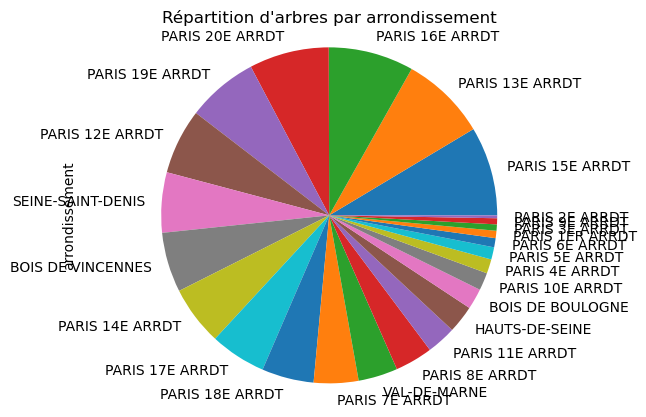

In [927]:
P2ArbresFrClean["arrondissement"].value_counts(normalize=True).plot(kind='pie')
plt.axis('equal') 
plt.title("Répartition d'arbres par arrondissement")
plt.show() 

On se rend vite compte que la répartition par arrondissement est plus ou moins bien égal partout

In [928]:
import pandas.plotting

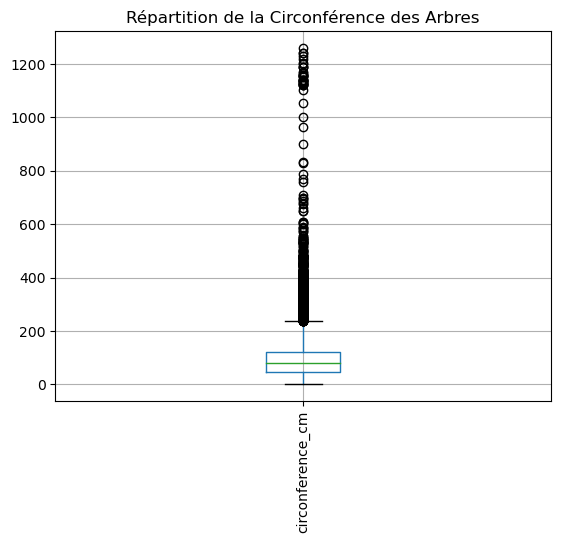

In [929]:
P2ArbresFrClean.boxplot(column="circonference_cm")
plt.xticks(rotation='vertical')
plt.title("Répartition de la Circonférence des Arbres")
plt.show()

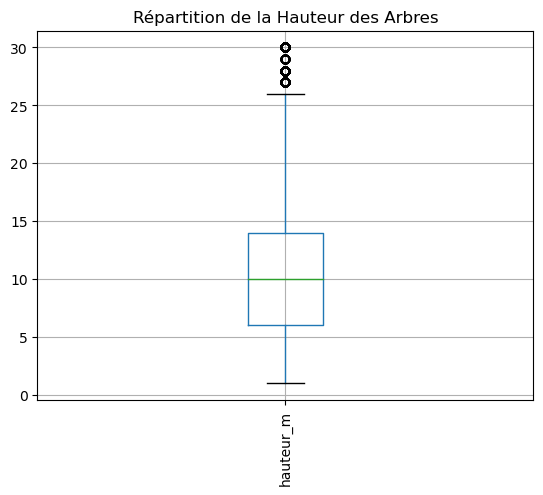

In [930]:
P2ArbresFrClean.boxplot(column="hauteur_m")
plt.xticks(ticks_labels, rotation='vertical')
plt.title("Répartition de la Hauteur des Arbres")
plt.show()

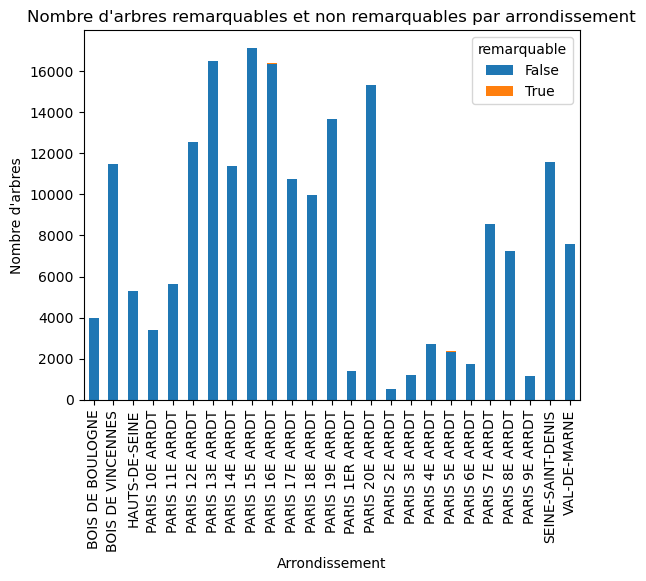

In [931]:
P2ArbresFrCleanGrouped = P2ArbresFrClean.groupby('arrondissement')['remarquable'].value_counts().unstack()

P2ArbresFrCleanGrouped.plot(kind='bar', stacked=True)

# Ajout de légendes et de titres
plt.xlabel('Arrondissement')
plt.ylabel('Nombre d\'arbres')
plt.title('Nombre d\'arbres remarquables et non remarquables par arrondissement')

# Affichage du graphique
plt.show()

In [932]:
# Filtrer les arbres avec circonférence inférieure à 350cm et hauteur inférieure à 7m
P2ArbresStandard = P2ArbresFrClean[((P2ArbresFrClean['circonference_cm'] < 35) | (P2ArbresFrClean['hauteur_m'] < 7)) & (P2ArbresFrClean['remarquable'] == False)]

# Filtrer les arbres pour le reste (circonférence >= 350cm ou hauteur >= 7m)
P2ArbreSpecifique = P2ArbresFrClean[((P2ArbresFrClean['circonference_cm'] >= 35) & (P2ArbresFrClean['hauteur_m'] >= 7)) & (P2ArbresFrClean['remarquable'] == False)]

# Filtrer les arbres remarquables
P2ArbreRemarquable = P2ArbresFrClean[(P2ArbresFrClean['remarquable'] == True)]

In [933]:
P2ArbresStandard.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50827 entries, 0 to 198878
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   50827 non-null  float64
 1   type_emplacement     50827 non-null  object 
 2   domanialite          50826 non-null  object 
 3   arrondissement       50827 non-null  object 
 4   lieu                 50827 non-null  object 
 5   id_emplacement       50827 non-null  object 
 6   libelle_francais     50118 non-null  object 
 7   genre                50827 non-null  object 
 8   espece               50068 non-null  object 
 9   circonference_cm     50602 non-null  float64
 10  hauteur_m            47765 non-null  float64
 11  stade_developpement  33293 non-null  object 
 12  remarquable          50827 non-null  object 
 13  geo_point_2d_a       50827 non-null  float64
 14  geo_point_2d_b       50827 non-null  float64
dtypes: float64(5), object(10)
memory us

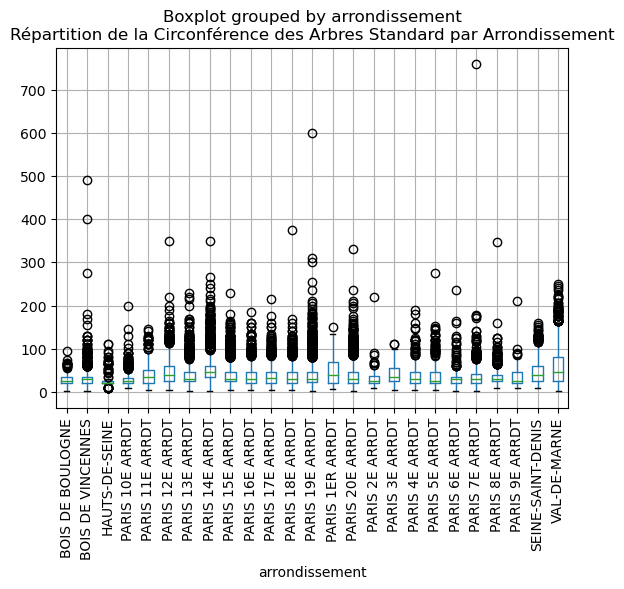

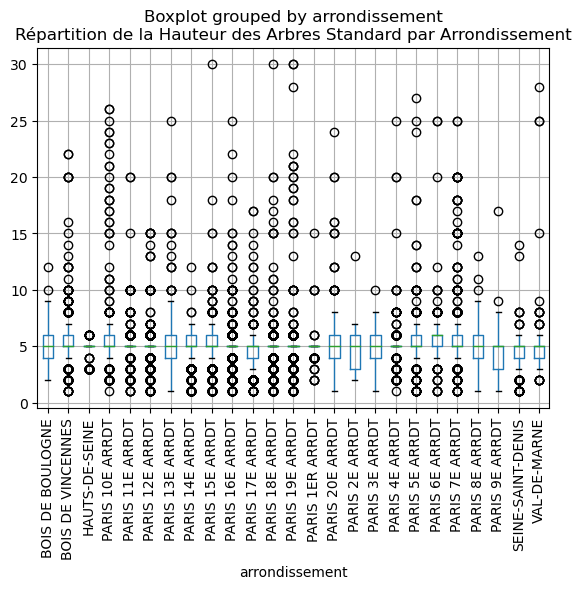

In [934]:
P2ArbresStandard.boxplot(column="circonference_cm",by="arrondissement")
plt.xticks( rotation='vertical')
plt.title("Répartition de la Circonférence des Arbres Standard par Arrondissement")
P2ArbresStandard.boxplot(column="hauteur_m",by="arrondissement")
plt.xticks(rotation='vertical')
plt.title("Répartition de la Hauteur des Arbres Standard par Arrondissement")
plt.show()

In [935]:
P2ArbresStandard.head()

,id,type_emplacement,domanialite,arrondissement,lieu,id_emplacement,libelle_francais,genre,espece,circonference_cm,hauteur_m,stade_developpement,remarquable,geo_point_2d_a,geo_point_2d_b
0,99874.0,Arbre,Jardin,PARIS 7E ARRDT,MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E,19,Marronnier,Aesculus,hippocastanum,20.0,5.0,NaN,False,48.857620,2.320962
10,99884.0,Arbre,Jardin,PARIS 16E ARRDT,JARDIN DE L AVENUE FOCH / 10 AVENUE FOCH,802007,Prunus n. sp.,Prunus,n. sp.,15.0,3.0,J,False,48.871948,2.275867
11,99885.0,Arbre,Jardin,PARIS 16E ARRDT,JARDIN DU RANELAGH,20001,Hêtre,Fagus,sylvatica,30.0,NaN,NaN,False,48.858222,2.269287
14,99889.0,Arbre,Jardin,PARIS 16E ARRDT,JARDIN DU RANELAGH,20007,Chêne,Quercus,robur,25.0,NaN,NaN,False,48.858227,2.268489
16,99891.0,Arbre,Jardin,PARIS 16E ARRDT,JARDIN DU RANELAGH,20012,Savonnier,Koelreuteria,paniculata,20.0,NaN,NaN,False,48.858048,2.268783


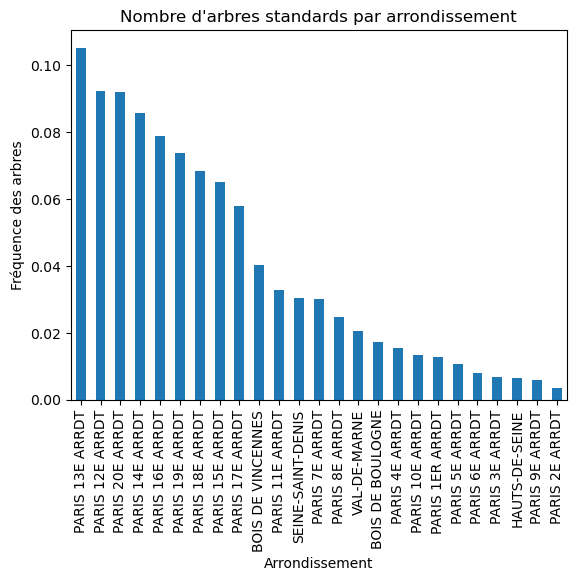

In [936]:
P2ArbresStandard["arrondissement"].value_counts(normalize=True).plot(kind='bar')

plt.xlabel('Arrondissement')
plt.ylabel('Fréquence des arbres')
plt.title('Nombre d\'arbres standards par arrondissement')

# Affichage du graphique
plt.show()

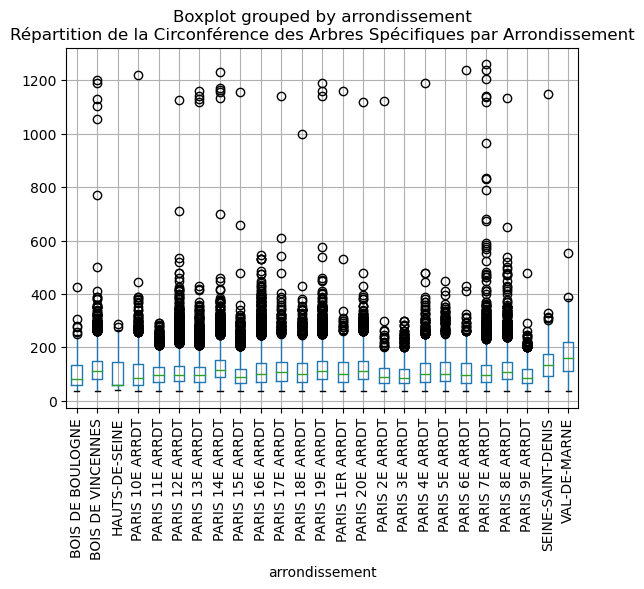

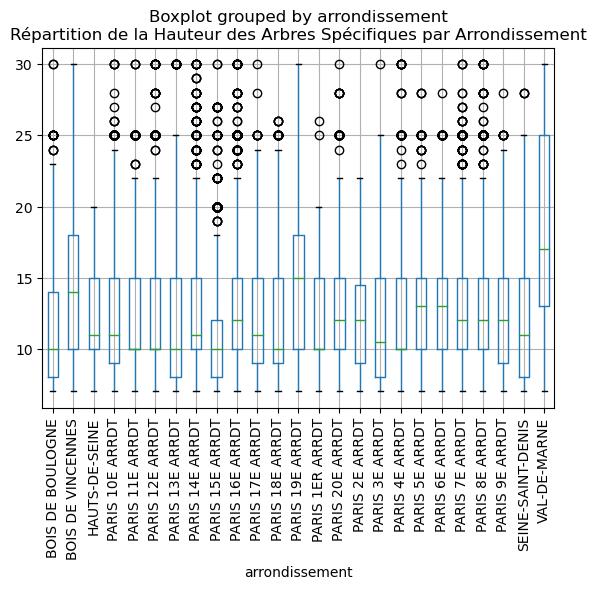

In [937]:
P2ArbreSpecifique.boxplot(column="circonference_cm",by="arrondissement")
plt.xticks(rotation='vertical')
plt.title("Répartition de la Circonférence des Arbres Spécifiques par Arrondissement")
P2ArbreSpecifique.boxplot(column="hauteur_m",by="arrondissement")
plt.xticks(rotation='vertical')
plt.title("Répartition de la Hauteur des Arbres Spécifiques par Arrondissement")
plt.show()

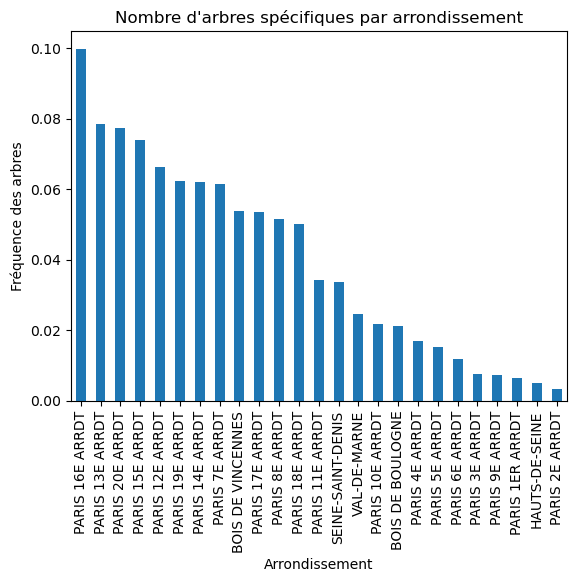

In [938]:
P2ArbreSpecifique["arrondissement"].value_counts(normalize=True).plot(kind='bar')

plt.xlabel('Arrondissement')
plt.ylabel('Fréquence des arbres')
plt.title('Nombre d\'arbres spécifiques par arrondissement')

# Affichage du graphique
plt.show()

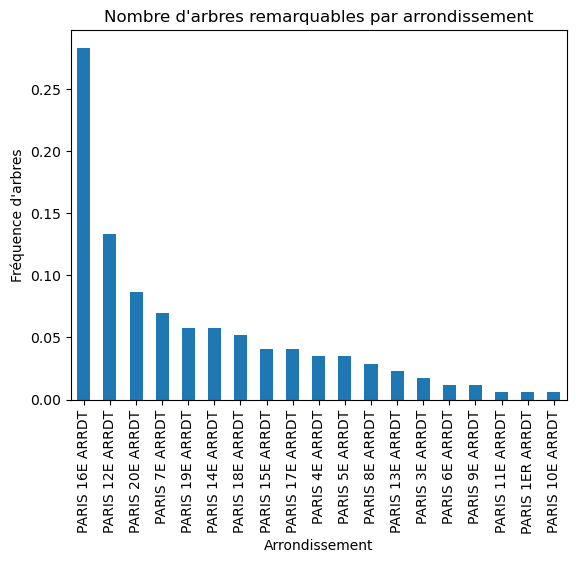

In [939]:
P2ArbreRemarquable["arrondissement"].value_counts(normalize=True).plot(kind='bar')

plt.xlabel('Arrondissement')
plt.ylabel('Fréquence d\'arbres')
plt.title('Nombre d\'arbres remarquables par arrondissement')

# Affichage du graphique
plt.show()

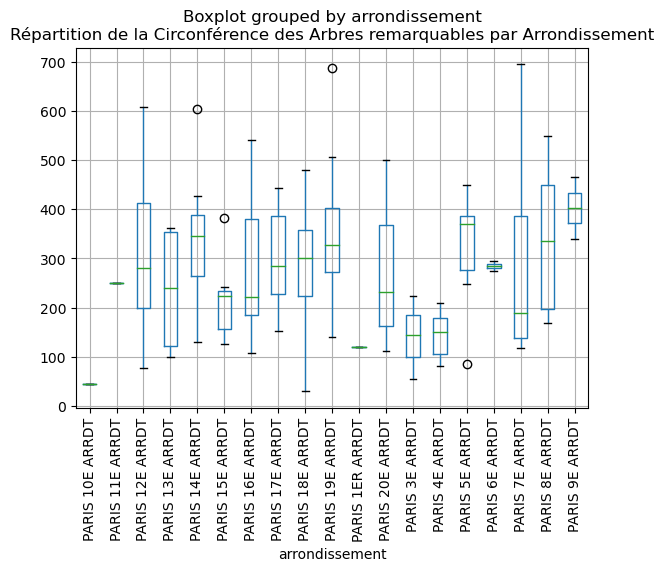

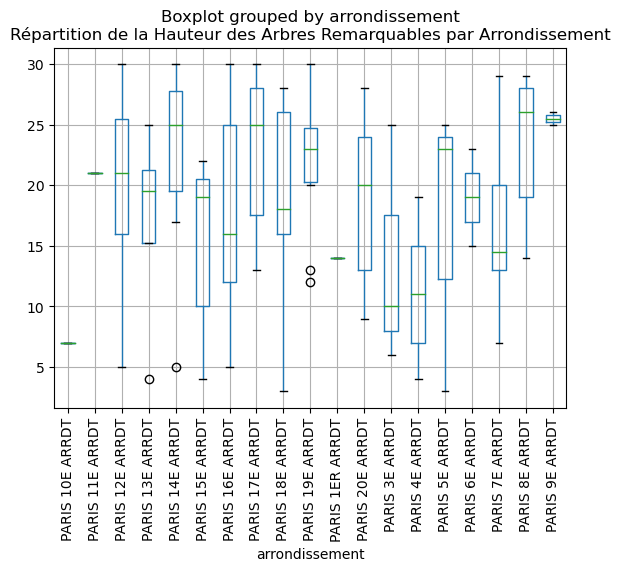

In [940]:
P2ArbreRemarquable.boxplot(column="circonference_cm",by="arrondissement")
plt.xticks( rotation='vertical')
plt.title("Répartition de la Circonférence des Arbres remarquables par Arrondissement")
P2ArbreRemarquable.boxplot(column="hauteur_m",by="arrondissement")
plt.xticks(rotation='vertical')
plt.title("Répartition de la Hauteur des Arbres Remarquables par Arrondissement")
plt.show()